In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#plot the decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV


#load file
dataset = pd.read_csv(r"./Dataset/dataset.csv")

In [4]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  


# apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)
       

    
#check the output
dataset.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#we now will make the checklist of all symptoms
#List of symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
#create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#create a list of all diseases
disease_list = dataset['Disease'].unique()      #we use the unique function to get all diseases

#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)

print("Number of unique diseases:", len(disease_list))
print("Symptoms:", disease_list)


print(disease_list[3])

Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

In [6]:
# Assume you want to keep the original disease/diagnosis column
#Each unique symptom becomes column, instead of writing symptom names, we have 1 if patient has the syptom and 0 if not


binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check ecah row
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
#so what we basically did : For each symptom in your list, check every patient.Mark 1 if the patient has this symptom anywhere, or 0 if not

#check the 


#make_fungal_infection == 1 and else 0

# Create a DataFrame for symptoms using vectorized operations


# If the patient has a fungal infection, we mark it as 1, else 0

params = []
scores = []

for i in range(len(disease_list)):
    binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
    binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

    #for each syptom we check ecah row
    for symptom in unique_symptoms:
        binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)


    binary['Disease'] = np.where(binary['Disease'] == disease_list[i], 1, 0)

        #get all rows with 1 Disease and split them into train and test data



    Trues = binary[binary['Disease'] == 1]  # Get all rows where Disease is 1

    Flases = binary[binary['Disease'] == 0]  # Get all rows where Disease is 0

    X_true = Trues.drop('Disease', axis=1)  # Features (symptoms)
    y_true = Trues['Disease']               # Target variable (disease)

    X_false = Flases.drop('Disease', axis=1)  # Features (symptoms)
    y_false = Flases['Disease']               # Target variable (disease)


    True_train, True_test, y_true_train, y_true_test = train_test_split(X_true, y_true, test_size=0.2, random_state=42)
    False_train, False_test, y_false_train, y_false_test = train_test_split(X_false, y_false, test_size=0.2, random_state=42)

    # Combine the training data
    X_train_bin = pd.concat([True_train, False_train])
    y_train_bin = pd.concat([y_true_train, y_false_train])

    # Combine the test data
    X_test_bin = pd.concat([True_test, False_test])
    y_test_bin = pd.concat([y_true_test, y_false_test])




    # Create and train the Decision Tree model
    dt_model_binary = DecisionTreeClassifier(random_state=42)  # You can adjust max_depth as needed

    max_depth_range = range(1, 8,1)  # Example range for max_depth
    min_samples_split_range = range(2, 4)  # Example range for min_samples_split
    min_samples_leaf_range = range(1, 4)  # Example range for min_samples_split

    param_grid = {'max_depth': max_depth_range}
    grid = GridSearchCV(dt_model_binary, param_grid, cv=10)
    grid.fit(X_train_bin, y_train_bin)
    param = grid.best_params_
    score = grid.score(X_test_bin, y_test_bin)

    print(param)

    params.append(param)
    scores.append(score)






#tree.plot_tree(dt_model_binary, filled=True, feature_names=X_train_bin.columns, class_names=['No', 'Yes'])



C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\1014500350.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2}


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[2, 2, 3, 7, 3, 2, 2, 1, 2, 3, 3, 3, 3, 2, 4, 5, 2, 1, 2, 2, 1, 5, 5, 1, 2, 1, 1, 1, 2, 4, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2]


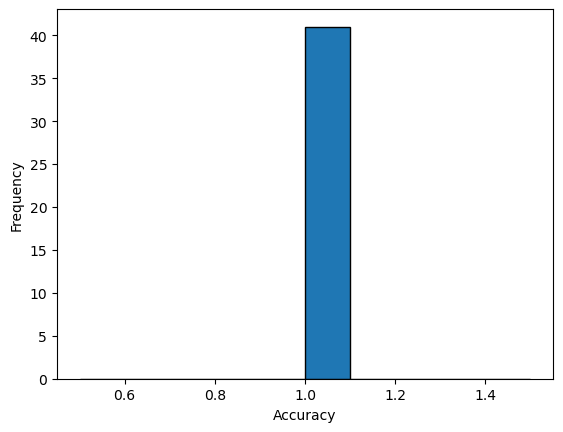

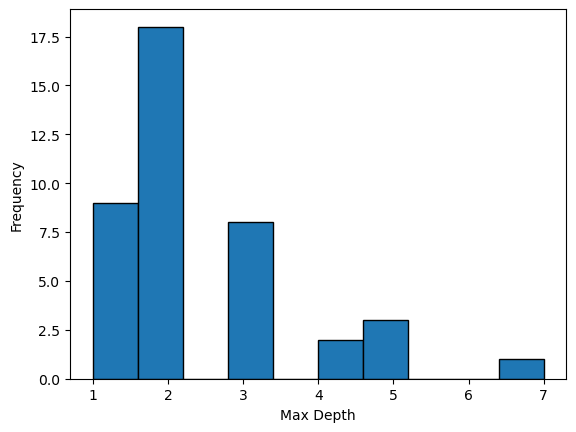

In [7]:
plt.figure()
plt.hist(scores, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

print(scores)

# Extract max_depth values from params for plotting
plt.figure()
max_depth_values = [param['max_depth'] for param in params]
plt.hist(max_depth_values, bins=10, edgecolor='black')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')

print(max_depth_values)


In [8]:
from sklearn.ensemble import RandomForestClassifier
params_rg = []
scores_rg = []

for i in range(len(disease_list)):
    binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
    binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

    #for each syptom we check ecah row
    for symptom in unique_symptoms:
        binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)


    binary['Disease'] = np.where(binary['Disease'] == disease_list[i], 1, 0)

        #get all rows with 1 Disease and split them into train and test data



    Trues = binary[binary['Disease'] == 1]  # Get all rows where Disease is 1

    Flases = binary[binary['Disease'] == 0]  # Get all rows where Disease is 0

    X_true = Trues.drop('Disease', axis=1)  # Features (symptoms)
    y_true = Trues['Disease']               # Target variable (disease)

    X_false = Flases.drop('Disease', axis=1)  # Features (symptoms)
    y_false = Flases['Disease']               # Target variable (disease)


    True_train, True_test, y_true_train, y_true_test = train_test_split(X_true, y_true, test_size=0.2, random_state=42)
    False_train, False_test, y_false_train, y_false_test = train_test_split(X_false, y_false, test_size=0.2, random_state=42)

    # Combine the training data
    X_train_bin = pd.concat([True_train, False_train])
    y_train_bin = pd.concat([y_true_train, y_false_train])

    # Combine the test data
    X_test_bin = pd.concat([True_test, False_test])
    y_test_bin = pd.concat([y_true_test, y_false_test])




    # Create and train the Decision Tree model
    rf_reg = RandomForestClassifier(random_state=42)

    n_estimators_range = range(1, 16, 4)  # Example range for n_estimators
    max_depth_range = range(1, 8)  # Example range for max_depth


    param_grid = {'n_estimators':n_estimators_range,'max_depth': max_depth_range}
    grid = GridSearchCV(rf_reg, param_grid, cv=10)
    grid.fit(X_train_bin, y_train_bin)
    print(grid.best_params_)
    print(grid.score(X_test_bin, y_test_bin))



    rf_reg = RandomForestClassifier(n_estimators= grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'],random_state=42)
    rf_reg.fit(X_train_bin, y_train_bin)
    param = grid.best_params_
    score = grid.score(X_test_bin, y_test_bin)

    print(param)

    params_rg.append(param)
    scores_rg.append(score)






C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 5}
0.9989837398373984
{'max_depth': 4, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 5}
1.0
{'max_depth': 5, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7, 'n_estimators': 9}
1.0
{'max_depth': 7, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 5}
1.0
{'max_depth': 5, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 9}
1.0
{'max_depth': 3, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 13}
1.0
{'max_depth': 3, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 6, 'n_estimators': 5}
1.0
{'max_depth': 6, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 9}
1.0
{'max_depth': 5, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7, 'n_estimators': 13}
1.0
{'max_depth': 7, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 13}
1.0
{'max_depth': 4, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7, 'n_estimators': 13}
0.9979674796747967
{'max_depth': 7, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 5}
1.0
{'max_depth': 5, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 5}
1.0
{'max_depth': 5, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 5}
1.0
{'max_depth': 3, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2, 'n_estimators': 5}
1.0
{'max_depth': 2, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 13}
1.0
{'max_depth': 3, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 1}
1.0
{'max_depth': 3, 'n_estimators': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7, 'n_estimators': 5}
1.0
{'max_depth': 7, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 7, 'n_estimators': 13}
1.0
{'max_depth': 7, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 5}
1.0
{'max_depth': 4, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 2, 'n_estimators': 13}
1.0
{'max_depth': 2, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1, 'n_estimators': 1}
1.0
{'max_depth': 1, 'n_estimators': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1, 'n_estimators': 1}
1.0
{'max_depth': 1, 'n_estimators': 1}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 13}
1.0
{'max_depth': 3, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 6, 'n_estimators': 5}
1.0
{'max_depth': 6, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 5}
1.0
{'max_depth': 3, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 1, 'n_estimators': 13}
1.0
{'max_depth': 1, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 13}
1.0
{'max_depth': 3, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 9}
1.0
{'max_depth': 3, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 3, 'n_estimators': 9}
1.0
{'max_depth': 3, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 6, 'n_estimators': 5}
1.0
{'max_depth': 6, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 9}
1.0
{'max_depth': 4, 'n_estimators': 9}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 5, 'n_estimators': 5}
1.0
{'max_depth': 5, 'n_estimators': 5}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 4, 'n_estimators': 13}
1.0
{'max_depth': 4, 'n_estimators': 13}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3863560008.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'max_depth': 6, 'n_estimators': 1}
1.0
{'max_depth': 6, 'n_estimators': 1}


[0.9989837398373984, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9979674796747967, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[2, 2, 3, 7, 3, 2, 2, 1, 2, 3, 3, 3, 3, 2, 4, 5, 2, 1, 2, 2, 1, 5, 5, 1, 2, 1, 1, 1, 2, 4, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2]


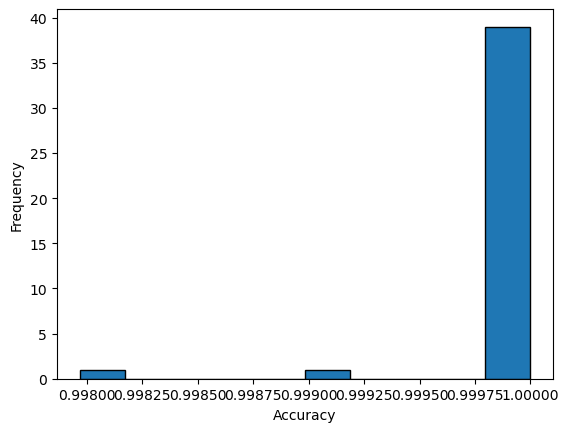

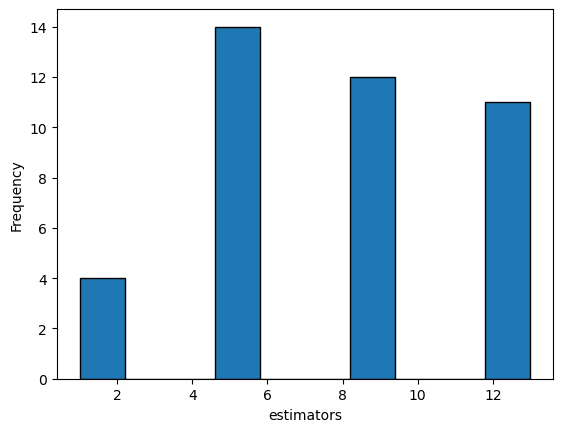

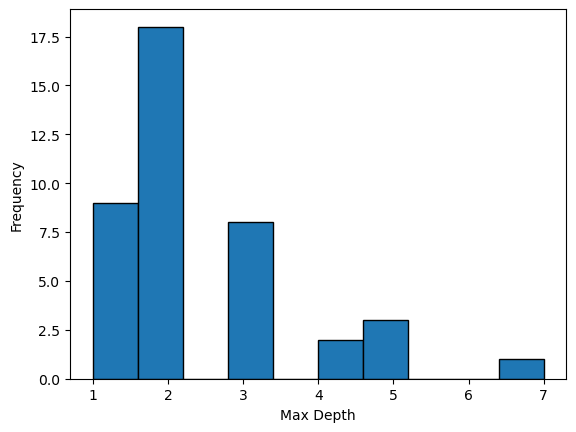

In [9]:
max_depth_values = [param['max_depth'] for param in params]
n_estimators_values = [param['n_estimators'] for param in params_rg]

plt.figure()
plt.hist(scores_rg, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

print(scores_rg)

# Extract max_depth values from params for plotting
plt.figure()
plt.hist(n_estimators_values, bins=10, edgecolor='black')
plt.xlabel('estimators')
plt.ylabel('Frequency')

plt.figure()
plt.hist(max_depth_values, bins=10, edgecolor='black')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')

print(max_depth_values)

In [10]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

params_lr = []
scores_lr = []

for i in range(len(disease_list)):
    binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
    binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

    #for each syptom we check ecah row
    for symptom in unique_symptoms:
        binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)


    binary['Disease'] = np.where(binary['Disease'] == disease_list[i], 1, 0)

        #get all rows with 1 Disease and split them into train and test data



    Trues = binary[binary['Disease'] == 1]  # Get all rows where Disease is 1

    Flases = binary[binary['Disease'] == 0]  # Get all rows where Disease is 0

    X_true = Trues.drop('Disease', axis=1)  # Features (symptoms)
    y_true = Trues['Disease']               # Target variable (disease)

    X_false = Flases.drop('Disease', axis=1)  # Features (symptoms)
    y_false = Flases['Disease']               # Target variable (disease)


    True_train, True_test, y_true_train, y_true_test = train_test_split(X_true, y_true, test_size=0.2, random_state=42)
    False_train, False_test, y_false_train, y_false_test = train_test_split(X_false, y_false, test_size=0.2, random_state=42)

    # Combine the training data
    X_train_bin = pd.concat([True_train, False_train])
    y_train_bin = pd.concat([y_true_train, y_false_train])

    # Combine the test data
    X_test_bin = pd.concat([True_test, False_test])
    y_test_bin = pd.concat([y_true_test, y_false_test])




    # Create and train the Decision Tree model
    log_reg = LogisticRegression(random_state=42)

    # Define the parameter grid for Logistic Regression
    # You can adjust the ranges as needed
    # Example ranges for C and max_iter
    C_range = [0.01, 0.1, 1, 10, 100]  # Example range for C
    max_iter_range = range(50, 201, 50)  # Example range for max_iter


    param_grid = {'C':C_range,'max_iter': max_iter_range}
    grid = GridSearchCV(log_reg, param_grid, cv=10)
    grid.fit(X_train_bin, y_train_bin)
    print(grid.best_params_)
    print(grid.score(X_test_bin, y_test_bin))


    log_reg = LogisticRegression(C= grid.best_params_['C'], max_iter=grid.best_params_['max_iter'],random_state=42)	
    log_reg.fit(X_train_bin, y_train_bin)
    param = grid.best_params_
    score = grid.score(X_test_bin, y_test_bin)

    print(param)

    params_rg.append(param)
    scores_rg.append(score)



C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.01, 'max_iter': 50}
1.0
{'C': 0.01, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 1, 'max_iter': 50}
1.0
{'C': 1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\louis\AppData\Local\Temp\ipykernel_19664\3290792135.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

{'C': 0.1, 'max_iter': 50}
1.0
{'C': 0.1, 'max_iter': 50}


In [11]:
C_values = [param['C'] for param in params_rg]
max_iter_values = [param['max_iter'] for param in params_rg]

plt.figure()
plt.hist(scores_rg, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

print(scores_rg)

# Extract max_depth values from params for plotting
plt.figure()
plt.hist(C_values, bins=10, edgecolor='black')
plt.xlabel('estimators')
plt.ylabel('Frequency')

plt.figure()
plt.hist(max_iter_values, bins=10, edgecolor='black')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')

print(max_iter_values)

KeyError: 'C'

{'max_depth': 2}
1.0


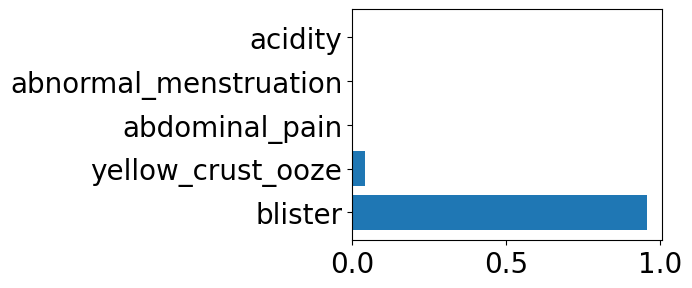

In [ ]:


    # Create and train the Decision Tree model
    dt_model_binary = DecisionTreeClassifier(random_state=42)  # You can adjust max_depth as needed

    max_depth_range = range(1, 4,1)  # Example range for max_depth
    min_samples_split_range = range(2, 4)  # Example range for min_samples_split
    min_samples_leaf_range = range(1, 4)  # Example range for min_samples_split

    param_grid = {'max_depth': max_depth_range}
    grid = GridSearchCV(dt_model_binary, param_grid, cv=10)
    grid.fit(X_train_bin, y_train_bin)
    print(grid.best_params_)
    print(grid.score(X_test_bin, y_test_bin))

    #,'min_samples_split': min_samples_split_range, 'min_samples_leaf': min_samples_leaf_range


    dt_model_binary = tree.DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], random_state=42)
    dt_model_binary.fit(X_train_bin, y_train_bin)

    feat_imp = dt_model_binary.feature_importances_



    tup = list(zip(binary.columns.tolist()[1:], feat_imp))  # Create a list of tuples (feature, importance)
    tup = sorted(tup, key=lambda x: x[1], reverse=True)  # Sort the tuples by importance

    plt.figure(figsize=(4, 3))
    plt.barh(range(5),[item[1] for item in tup[0:5]])
    plt.yticks(range(5),[item[0] for item in tup[0:5]])
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.show()


#tree.plot_tree(dt_model_binary, filled=True, feature_names=X_train_bin.columns, class_names=['No', 'Yes'])

